# Online Retail Dataset Exploratory Data Analysis
<hr style="border: 2px solid #000000;">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

---

# Table of Contents
1. [Introduction](#I.-Introduction)
2. [Customer Analysis](#II.-Customer-Analysis)
3. [Product Analysis](#III.-Product-Analysis)
4. [Temporal Analysis](#IV.-Temporal-Analysis)
5. [Country Analysis](#V.-Country-Analysis)
6. [Canceled Orders](#VI.-Canceled-Orders)
7. [Conclusion](#VII.-Conclusion)

---

## I. Introduction

Welcome to the "Online Retail Exploratory Data Analysis" Notebook for the UCI Machine Learning Repository dataset. This phase represents a crucial step in preparing the dataset for in-depth analysis and modeling. The dataset, a rich source of information, demands a nuanced exploration to extract meaningful patterns and correlations. Through meticulous examination and the application of statistical techniques, the objective is to unravel the narrative concealed within the data, shedding light on customer preferences, product dynamics, temporal trends, and the impact of different countries on the study.

Readers are invited to join this journey through the various facets of the dataset, navigating through Customer Analysis, Product Analysis, Time Analysis, and Country Analysis. By the conclusion of this EDA phase, the goal is to provide a well-understood, meticulously analyzed dataset, laying the groundwork for conclusive findings and actionable insights for the audience.

This data set which contains transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. Source: http://archive.ics.uci.edu/ml/datasets/Online+Retail

The dataset underwent a thorough cleaning process in the Online Retail Data Cleaning Notebook, where various measures were implemented to enhance its quality and usability. Additionally, several key features were incorporated to facilitate a more insightful and comprehensive analysis in subsequent phases. This preparatory step ensures that the dataset is primed for a detailed exploration of customer behavior, product dynamics, time trends, and country-specific insights during the Exploratory Data Analysis (EDA) phase.

Each key feature in the dataset represents a unique transaction, and understanding its structure is essential for subsequent data analysis and cleaning.

Examination of the fundamental features that characterize each transaction reveals:

- **InvoiceNo:** A 6-digit integral number serving as a unique identifier for each transaction. 
- **StockCode:** A 5-digit integral number assigned to each distinct product, uniquely identifying items in the dataset.
- **Description:** The nominal field that holds the product or item name.
- **Quantity:** Numeric field representing the quantities of each product per transaction.
- **InvoiceDate:** Numeric field indicating the date and time when a transaction occurred.
- **UnitPrice:** Numeric field denoting the unit price of each product in sterling (£).
- **CustomerID:** A 5-digit integral number serving as a unique identifier for each customer.
- **Country:** Nominal field indicating the country where a customer resides.
- **TotalPrice:** This column represents the total monetary value of each transaction, calculated by multiplying the quantity of items purchased by their respective unit prices.
- **Hour:** Specific hour of the day when each transaction occurred, extracted from the 'InvoiceDate' timestamp.
- **Day:** Day of the week (0 for Monday, 1 for Tuesday, and so on) when each transaction took place, derived from the 'InvoiceDate' timestamp.
- **Month:** Numerical representation of the month when each transaction occurred, extracted from the 'InvoiceDate' timestamp.
- **IsRepeatCustomer:** Binary flag, indicating whether a customer has made more than one purchase ('True') or only a single purchase ('False').

### Overview of Dataset Characteristics

Before delving into more specific analyses, a pause is taken to examine the cleaned dataset and its fundamental features. This initial exploration is designed to provide a snapshot of the dataset's characteristics, enabling a quick understanding of its structure and distribution. By inspecting basic features, the stage is set for a more in-depth exploration, facilitating the extraction of meaningful insights during the subsequent phases of the analysis.

In [2]:
# Set the working directory to the 'Online-Retail-Data-Analysis' folder
os.chdir(os.path.abspath('..'))

# Define the relative path to the data folder and the CSV file
data_relative_path = os.path.join('Data', 'CleanedData.csv')

# Construct the absolute path to the CSV file
data_path = os.path.join(os.getcwd(), data_relative_path)

# Read the CSV file into a Pandas DataFrame
cleaned_data = pd.read_csv(data_path, encoding='latin1')

cleaned_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day,Month,IsRepeatCustomer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,12,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,True


In [3]:
#view data information
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         392692 non-null  int64  
 1   StockCode         392692 non-null  object 
 2   Description       392692 non-null  object 
 3   Quantity          392692 non-null  int64  
 4   InvoiceDate       392692 non-null  object 
 5   UnitPrice         392692 non-null  float64
 6   CustomerID        392692 non-null  float64
 7   Country           392692 non-null  object 
 8   TotalPrice        392692 non-null  float64
 9   Hour              392692 non-null  int64  
 10  Day               392692 non-null  int64  
 11  Month             392692 non-null  int64  
 12  IsRepeatCustomer  392692 non-null  bool   
dtypes: bool(1), float64(3), int64(5), object(4)
memory usage: 36.3+ MB


In [4]:
#quantitative data
cleaned_data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice,Hour,Day,Month
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865,22.631500,12.721532,2.606911,7.601871
std,13087.063759,180.492832,22.241836,1713.539549,311.099224,2.276661,1.923929,3.415015
min,536365.000000,1.000000,0.001000,12346.000000,0.001000,6.000000,0.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,4.950000,11.000000,1.000000,5.000000
50%,561874.000000,6.000000,1.950000,15150.000000,12.450000,13.000000,2.000000,8.000000
75%,572061.000000,12.000000,3.750000,16791.000000,19.800000,14.000000,4.000000,11.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000,20.000000,6.000000,12.000000


---

## II. Customer Analysis

This section is devoted to unraveling the intricacies of customer behavior and preferences. Delving into key metrics such as customer retention, transaction frequenct, and top customers, the analysis aspires to construct a comprehensive portrayal of the customer base. Through insightful analytics, the objective is to identify loyal patrons, discern trends in purchasing behavior, and, ultimately, inform strategies to better meet the needs and expectations of diverse customer segments. Readers are invited to observe the exploration of data that unveils compelling stories about valued customers, setting the stage for targeted marketing initiatives and elevated customer satisfaction.

In [5]:
#unique customers
print("Number of customers:",cleaned_data['CustomerID'].nunique())

Number of customers: 4338


The analysis begins by calculating the number of unique customers, revealing a total of 4338 individuals to be the focus of our examination. This sizable customer base sets the foundation for a comprehensive exploration of purchasing behavior, preferences.

### Customer Retention Rate

In [6]:
#calculate total customers
total_customers = cleaned_data['CustomerID'].nunique()

#calculate repeat customers
repeat_customers = cleaned_data[cleaned_data['IsRepeatCustomer']]['CustomerID'].nunique()

#calculate retention rate
retention_rate = (repeat_customers / total_customers) * 100

print(f'Retention Rate: {retention_rate:.2f}%')

Retention Rate: 65.58%


The analysis of the modified dataset revealed valuable insights into customer retention for our online retail business. With a total customer base of 4338, it was found that 65.58%, have made repeat purchases. This signifies a positive trend in customer loyalty, providing a key indicator of our business's effectiveness in retaining customers over time. A higher retention rate implies a strong level of customer loyalty, which could be attributed to successful marketing campaigns, excellent customer service, or enticing loyalty programs. This analysis provides a foundation for strategic decision-making, allowing us to tailor marketing efforts, enhance customer experience, and ultimately drive long-term business success. Regular monitoring of these metrics will enable us to adapt and refine our business strategies in response to evolving customer behaviors and market dynamics.

### Transaction Frequency

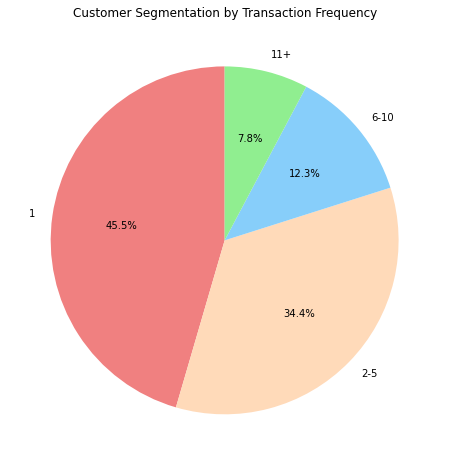

In [7]:
#transaction frequency
transaction_frequency = cleaned_data.groupby('CustomerID')['InvoiceNo'].nunique()

#define segments based on frequency
bins = [0, 1, 5, 10, np.inf]
labels = ['1', '2-5', '6-10', '11+']
cleaned_data['TransactionFrequency'] = pd.cut(transaction_frequency, bins=bins, labels=labels)

#analyze each segment
segment_counts = cleaned_data['TransactionFrequency'].value_counts()

#plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'peachpuff', 'lightskyblue', 'lightgreen'])
plt.title('Customer Segmentation by Transaction Frequency')
plt.show()

The analysis initiates with an exploration of transaction frequency, wherein customers are categorized into groups based on the number of transactions. Notably, 45.5% of customers make a single purchase, 34.4% engage in 2-5 transactions, 12.3% exhibit 6-10 transactions, and 7.8% are characterized by 11 or more transactions. This segmentation provides valuable insights into the distribution of customer engagement levels, laying the groundwork for a more detailed investigation into the behaviors and preferences of distinct customer segments.

1. **Majority of One-Time Buyers:** The significant percentage (45.5%) of customers making a single purchase suggests a substantial portion of the customer base engages in isolated transactions. Understanding the characteristics and preferences of this group may uncover opportunities for targeted promotions or incentives to encourage repeat business.

2. **Potential for Loyalty Programs:** The 12.3% of customers exhibiting 6-10 transactions indicate a group with higher-than-average engagement. Exploring this segment further can reveal patterns of loyalty and potential interest in loyalty programs, encouraging sustained customer relationships.

3. **Diverse Engagement Levels Across Segments:** The segmented analysis highlights a spectrum of customer engagement levels, ranging from one-time buyers to those making 11 or more transactions. This diversity suggests that implementing a one-size-fits-all approach to marketing and customer engagement may not be optimal. Instead, tailoring strategies based on the distinct needs and preferences within each segment can lead to more effective and personalized interactions. 

Overall, this segmentation provides a foundation for deeper investigations into the behaviors and preferences of distinct customer segments. It can guide targeted marketing strategies, customer retention initiatives, and the development of personalized approaches to enhance the overall customer experience.


### Top Customers

In [8]:
#total spending per customer
total_spending = cleaned_data.groupby('CustomerID')['TotalPrice'].sum()

#orting to get top customers
top_customers = total_spending.sort_values(ascending=False).head(10)
top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalPrice, dtype: float64

Identifying the top customers within our dataset provides profound insights into the dynamics of customer spending. The process involves calculating the total spending per customer and sorting the data to unveil the customers who contribute significantly to our revenue. In this context, the code snippet computes the total spending for each customer and identifies the top 10 customers based on their spending amounts. Delving into the spending patterns of these top customers reveals valuable information about their preferences, favored product categories, and overall purchasing behavior. These insights not only aid in recognizing and appreciating our most valuable clientele but also lay the groundwork for personalized marketing approaches, loyalty programs, and tailored services. 

By understanding the most purchased products by these high-value customers, the company can refine its offerings to better meet the specific needs and preferences of its most valued clientele, fostering stronger and more profitable customer relationships.

In [9]:
#store the most purchased product and its cost for each top customer
most_purchased_product_info = cleaned_data.groupby('CustomerID').apply(lambda x: x.loc[x['Description'] == x['Description'].mode().iloc[0], ['Description', 'TotalPrice']])
most_purchased_product_info.reset_index(drop=True, inplace=True)

#display the top ten most purchased products and their costs for each top customer
top_ten_most_purchased = most_purchased_product_info.groupby('Description')['TotalPrice'].mean().sort_values(ascending=False).head(10)
print("\nTop Ten Most Purchased Products and Their Costs by Each Top Customer:")
print(top_ten_most_purchased)


Top Ten Most Purchased Products and Their Costs by Each Top Customer:
Description
MEDIUM CERAMIC TOP STORAGE JAR     25729.533333
PICNIC BASKET WICKER 60 PIECES     19809.750000
EMPIRE DESIGN ROSETTE               3202.920000
SMALL POPCORN HOLDER                3096.000000
VINTAGE DOILY JUMBO BAG RED         1352.900000
DOORMAT FAIRY CAKE                   992.138889
METAL SIGN TAKE IT OR LEAVE IT       978.525000
Manual                               740.389750
RED  HARMONICA IN BOX                635.387500
GLASS CLOCHE LARGE                   550.800000
Name: TotalPrice, dtype: float64


It appears that these customers are categorized as "top customers" primarily because of their substantial purchases of high-value items.

---

## III. Product Analysis

As the project delves into the data, the objective is to uncover patterns that illuminate the most popular and lucrative products within the inventory. By analyzing the quantity sold, the aim is to recognize the products that resonate most with customers in terms of demand and popularity. Simultaneously, delving into revenue figures provides a deeper understanding of the financial impact of each product, offering insights into profitability and overall market value.

In [10]:
#unique Products
print("Number of products:",cleaned_data['StockCode'].nunique())

Number of products: 3665


The analysis begins by calculating the number of unique product, revealing a total of 3665  to be the focus of our examination. This sizable product base sets the foundation for a comprehensive exploration of purchasing behavior, preferences.

### Top Products by Quantity Sold

Overall Total Quantity Sold: 5152002


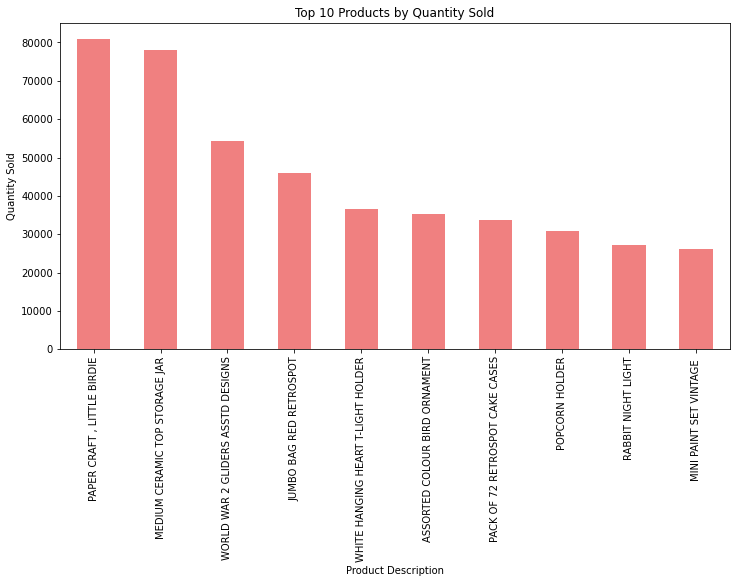

In [11]:
#calculate total quantity sold for the entire dataset
total_quantity = cleaned_data['Quantity'].sum()

#print the total quantity
print(f"Overall Total Quantity Sold: {total_quantity}")


#top 10 products by quantity sold
top_products_quantity = cleaned_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

#bar chart for top products by quantity
plt.figure(figsize=(12, 6))
top_products_quantity.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.show()

Identifying top-selling products by quantity provides valuable insights into consumer preferences and market demand. This analysis not only highlights items with the highest sales volume but also uncovers products that resonate most with customers. Businesses can strategically manage inventory, ensuring popular items are well-stocked, and tailor marketing campaigns to proven audience favorites. This information forms a foundation for strategic decision-making, influencing product development, pricing strategies, and overall business growth. It offers actionable intelligence to optimize operations and enhance the overall customer experience by aligning product offerings with consumer behavior.

### Top Product by Revenue Generated

Overall Total Revenue: 8887208.89


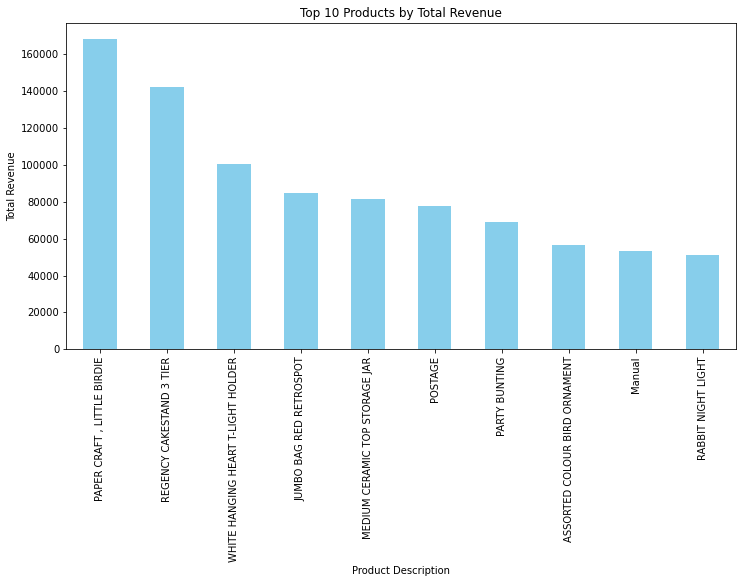

In [12]:
#calculate total revenue for the entire dataset
total_revenue = cleaned_data['TotalPrice'].sum()

#print the total revenue
print(f"Overall Total Revenue: {total_revenue:.2f}")

#top 10 products by total revenue
top_products_revenue = cleaned_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

#bar chart for top products by revenue
plt.figure(figsize=(12, 6))
top_products_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.show()

Identifying top products by revenue provides crucial insights for strategic decision-making. This analysis offers a nuanced understanding of each product's financial impact, guiding businesses to recognize both popular items and those with the highest profitability. By prioritizing revenue, companies can optimize pricing strategies and allocate resources effectively, ensuring products align with market value and generate optimal returns. This approach facilitates a balanced and data-driven product management strategy, aligning offerings with both customer preferences and financial objectives.

---

## IV. Temporal Analysis

This investigation delves into the ebb and flow of sales on a monthly, day-of-week, and hourly basis, providing invaluable insights into the temporal dynamics of the business. The objective is to uncover patterns that illuminate peak activity periods and potential areas for optimization. The analysis of monthly sales offers a broad perspective on long-term trends, while the examination of day-of-week and hourly sales provides a granular understanding of daily and hourly variations.

### Monthly Sale Trends

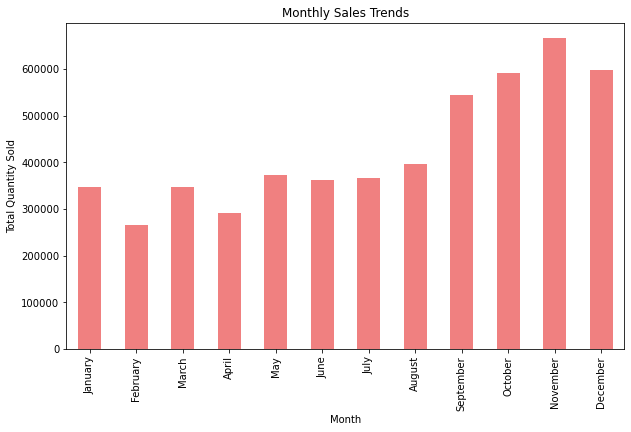

In [13]:
#monthly sales trends
monthly_sales = cleaned_data.groupby('Month')['Quantity'].sum()

#set month names as index
monthly_sales.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#plotting the bar graph
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightcoral')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

Monthly trends reveal a noticeable surge in purchasing activity during the months leading up to December and in December itself. This surge is reasonably attributed to the Christmas season, a period traditionally associated with increased shopping and gift-giving.


Armed with the insight into peak purchasing during the months leading to December, and particularly in December itself, the company can strategize and tailor its operations in several ways:

1. **Optimized Inventory Management:** Anticipate increased demand during the holiday season and adjust inventory levels accordingly to prevent stockouts and ensure products are readily available.

2. **Marketing and Promotions:** Plan targeted marketing campaigns and promotions leading up to and during December, capitalizing on the heightened purchasing behavior during the Christmas season.

3. **Supply Chain Planning:** Collaborate with suppliers and optimize supply chain logistics to handle increased demand efficiently and minimize potential disruptions.

4. **Customer Engagement:** Enhance customer engagement by creating festive and appealing shopping experiences, leveraging holiday-themed content, and possibly introducing loyalty programs or exclusive offers.

5. **Post-Holiday Strategies:** Develop strategies to retain customers and sustain sales momentum post-holiday, possibly through follow-up promotions, loyalty programs, or personalized marketing.

By leveraging this information strategically, the company can not only capitalize on the Christmas season but also foster long-term customer relationships and optimize its overall business performance.

### Day of Week Sales Trends

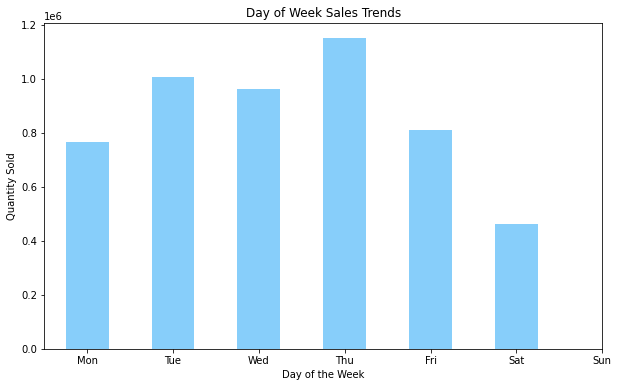

In [14]:
#day of week sales trends
daily_sales = cleaned_data.groupby('Day')['Quantity'].sum()

#bar chart for daily sales trends
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='lightskyblue')
plt.title('Day of Week Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity Sold')

#set xticks with specified labels
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.show()


The daily sales trends depict consistent purchasing activity throughout the week, with a notable peak on Thursday followed by a decline on Friday, and a further decrease on Saturday. Interestingly, no sales are recorded on Sunday, suggesting a strategic approach aligned with the observed trends.


The observed daily sales trends can offer several valuable insights for strategic decision-making:

1. **Optimal Staffing and Resource Allocation:** Adjust staffing levels based on the observed trends, ensuring that resources are optimized during peak days like Thursday and scaled down during lower sales periods on Friday and Saturday.

2. **Marketing and Promotions:** Concentrate marketing efforts and promotional activities on Thursdays to capitalize on the peak in purchasing behavior. Consider introducing special promotions or incentives to boost sales during the observed slower days.

3. **Inventory Management:** Align inventory management strategies with the observed trends. Ensure that stock levels are adjusted to meet increased demand on Thursdays and are managed efficiently during the slower days to avoid overstock.

By leveraging these insights, businesses can make informed decisions to enhance customer satisfaction, streamline operations, and maximize revenue opportunities in alignment with observed daily sales trends.


### Hourly Sales Trends

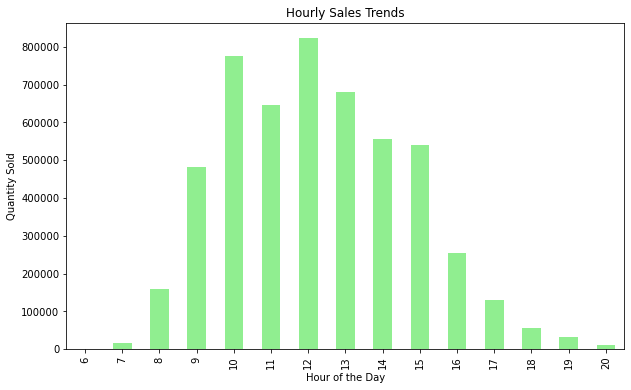

In [15]:
#hourly sales trends
hourly_sales = cleaned_data.groupby('Hour')['Quantity'].sum()

#line chart for hourly sales trends
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='lightgreen')
plt.title('Hourly Sales Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.show()

The hourly time analysis shows peak purchasing at noon and consistently high purchases from 9 AM to 3 PM. This is likely due to lunchtime shopping habits, where customers are actively making purchases during their midday breaks or leisure periods.

Marketing strategies suggested based on day-of-week purchasing, such as optimal staffing, promotions, and inventory management, can also be more effectively employed during these peak hours.

---

## V. Country Analysis

This phase entails a thorough examination of the geographical aspects within the Online Retail Dataset. The analysis comprehensively evaluates total sales, the number of customers, and average transaction values, providing insights into interactions and transactions. Notably, the dataset predominantly features transactions from the UK, reflecting its origin as a UK-based company. While this concentration offers valuable insights, it poses challenges in data visualization due to its dominance. A pivotal aspect of the analysis involves identifying instances when the UK's proportion is notably large, documenting these occurrences, and selectively excluding them from visualizations. This approach ensures a more nuanced and informative exploration of country-specific trends. Join the exploration as it navigates through the intricacies of geographical patterns, unraveling insights within the context of our UK-based online retail dataset.

### Top Countries by Total Sales

In [16]:
#group by 'Country' and calculate total sales
country_sales = cleaned_data.groupby('Country')['TotalPrice'].sum()

#sort the total sales
sorted_country_sales = country_sales.sort_values(ascending=False)

#display the top 5 countries by total sales
top_5_country_sales = sorted_country_sales.head(5)
print(top_5_country_sales)

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: TotalPrice, dtype: float64


The United Kingdom emerges as the frontrunner in top sales within this dataset. To ensure clarity and readability, the visualization intentionally excludes this dominant data.

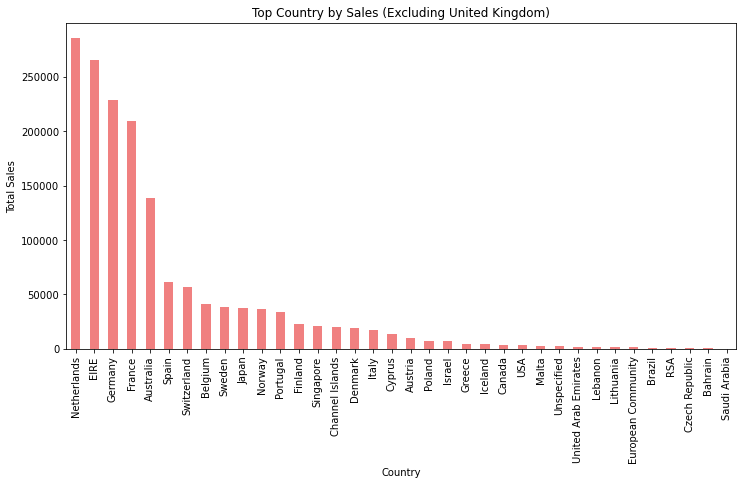

In [17]:
#exclude entries for the United Kingdom
countries_excluding_uk = cleaned_data[cleaned_data['Country'] != 'United Kingdom']

#group by 'Country' and calculate total sales
country_sales_excluding_uk = countries_excluding_uk.groupby('Country')['TotalPrice'].sum()

#bar chart for country-wise sales excluding the United Kingdom
plt.figure(figsize=(12, 6))
country_sales_excluding_uk.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Top Country by Sales (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


By discerning the top sales performers by country, a comprehensive understanding of each nation's contribution to the overall revenue is gained. Recognizing the key markets that exert a significant influence on the business's financial performance becomes paramount. This insight empowers the company to strategically prioritize marketing initiatives and retail allocation, encompassing the top-performing countries, including the UK.

### Top Countries by Number of Customers

In [18]:
#group by 'Country' and calculate the number of unique customers
customer_count_per_country = cleaned_data.groupby('Country')['CustomerID'].nunique()

#sort the customer counts
sorted_customer_count = customer_count_per_country.sort_values(ascending=False)

#display the top 5 countries by the number of unique customers
top_5_customer_count = sorted_customer_count.head(5)
print(top_5_customer_count)


Country
United Kingdom    3920
Germany             94
France              87
Spain               30
Belgium             25
Name: CustomerID, dtype: int64


The United Kingdom emerges as the frontrunner in highest number of customers within this dataset. To ensure clarity and readability, the visualization intentionally excludes this dominant data.

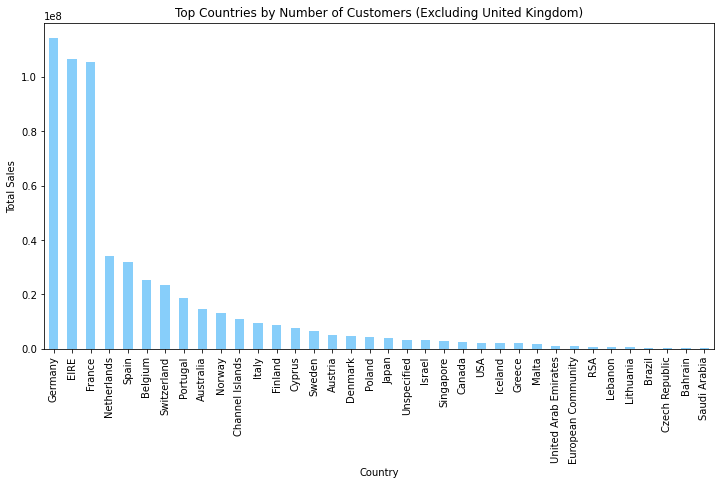

In [19]:
#group by 'Country' and calculate number of customers
country_CID_excluding_uk = countries_excluding_uk.groupby('Country')['CustomerID'].sum()

# Bar chart for number of customers excluding the United Kingdom
plt.figure(figsize=(12, 6))
country_CID_excluding_uk.sort_values(ascending=False).plot(kind='bar', color='lightskyblue')
plt.title('Top Countries by Number of Customers (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

Gaining insights into the distribution of customers across various countries provides valuable observations for strategic decision-making. This analysis yields similar insights to those derived from examining top sales, emphasizing the importance of effective market penetration. Additionally, it pinpoints countries with the highest customer counts, indicating substantial potential for growth and opportunities for expanding sales in these regions.

### Top Country by Average Transaction Value

In [20]:
#group by 'Country' and calculate the average transaction value
avg_transaction_value = cleaned_data.groupby('Country')['TotalPrice'].mean()

#sort the average transaction values
sorted_avg_transaction_value = avg_transaction_value.sort_values(ascending=False)

#display the top 5 countries by the average transaction value
top_5_avg_transaction_value = sorted_avg_transaction_value.head(5)
print(top_5_avg_transaction_value)


Country
Netherlands    121.003111
Australia      117.234386
Japan          116.561900
Singapore       95.852658
Sweden          85.261844
Name: TotalPrice, dtype: float64


Importantly, the UK does not exhibit a disproportionately high presence in this analysis, making it suitable for inclusion in the visualization.

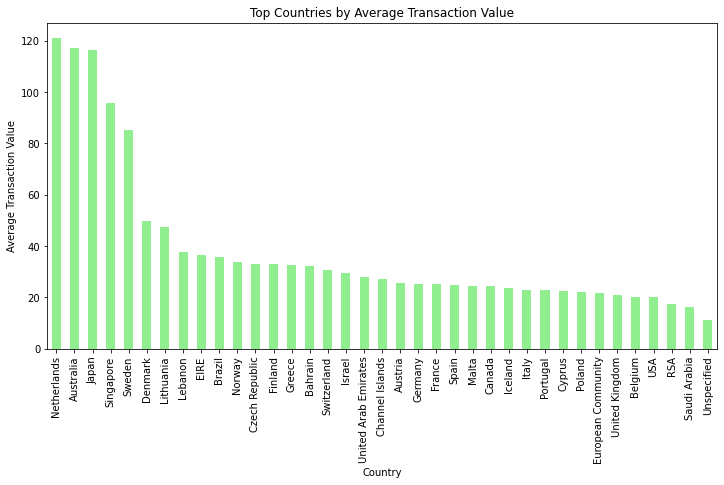

In [21]:
#calculate average transaction value per country
avg_transaction_value = cleaned_data.groupby('Country')['TotalPrice'].mean()

#bar chart for average transaction value per country
plt.figure(figsize=(12, 6))
avg_transaction_value.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Top Countries by Average Transaction Value')
plt.xlabel('Country')
plt.ylabel('Average Transaction Value')
plt.show()

Analyzing transaction values by country is crucial for strategic decision-making in online retail. Identifying key markets through understanding revenue distribution optimizes resource allocation. Recognizing countries with higher transaction values guides tailored marketing strategies. Comparing values across countries aids in effective competitive benchmarking, positioning businesses strategically in the global market. These insights empower businesses to elevate profitability, customer engagement, and competitiveness within the dynamic online retail landscape.

### Top Country by Transaction Frequency

In [22]:
#count transaction frequency per country
transaction_frequency = cleaned_data.groupby('Country')['InvoiceNo'].nunique()

#sort the transaction frequencies
sorted_transaction_frequency = transaction_frequency.sort_values(ascending=False)

#display the top 5 transaction frequencies
top_5_transaction_frequency = sorted_transaction_frequency.head(5)
print(top_5_transaction_frequency)

Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Name: InvoiceNo, dtype: int64


The United Kingdom emerges as the frontrunner in highest transaction frequency within this dataset. To ensure clarity and readability, the visualization intentionally excludes this dominant data.

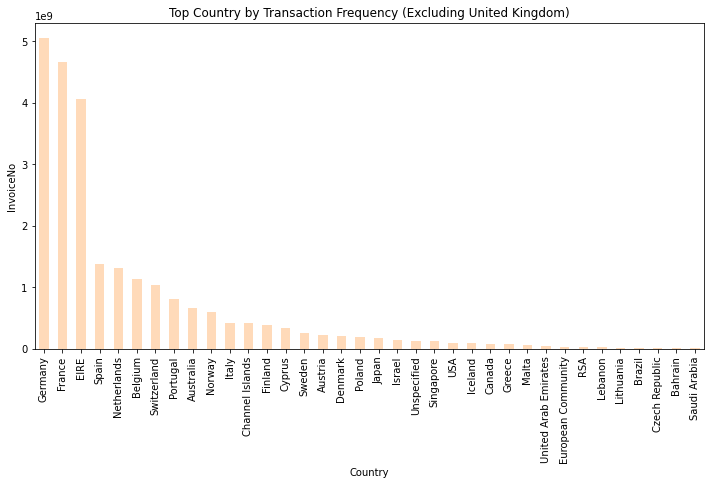

In [23]:
#group by 'Country' and calculate total sales
country_IN_excluding_uk = countries_excluding_uk.groupby('Country')['InvoiceNo'].sum()

#bar chart for country-wise sales excluding the United Kingdom
plt.figure(figsize=(12, 6))
country_IN_excluding_uk.sort_values(ascending=False).plot(kind='bar', color='peachpuff')
plt.title('Top Country by Transaction Frequency (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('InvoiceNo')
plt.show()


Showcasing the top country by transaction frequency offers insights into customer behavior, loyalty, and market dynamics. This information can inform various business strategies, including marketing, inventory management, and overall market expansion efforts.

### Overall Top Country Analysis

Overall, the company stands to benefit significantly by concentrating its transaction-focused efforts primarily in the UK, with additional strategic emphasis on Germany, France, Ireland (EIRE), and Spain. Prioritizing marketing strategies tailored to these top-performing countries is crucial to maximize overall effectiveness and yield the most favorable results.

---

## VI. Canceled Orders  

### Overview of Canceled Orders Characteristics

After segregating the canceled orders into this dataset, an extensive cleaning process was conducted in the Online Retail Data Cleaning Notebook. Furthermore, various crucial features were integrated to enhance the dataset, laying the groundwork for a more insightful and comprehensive analysis in subsequent phases. This preparatory step guarantees that the dataset is well-prepared for a detailed exploration of customer behavior, product dynamics, time trends, and country-specific insights during the Exploratory Data Analysis (EDA) phase.

The only distinctive attribute deviating from the cleaned_data is that **IsRepeatCustomer** has been replaced with **RepeatCanceled** in the modified dataset.

- **RepeatCanceled:** Binary flag, indicating whether a customer has made more than one cancelation ('True') or only a single cancelation ('False').

Before delving into more specific analyses, a pause is taken to examine the cleaned_canceled dataset and its fundamental features. This initial exploration is designed to provide a snapshot of the dataset's characteristics, enabling a quick understanding of its structure and distribution. By inspecting basic features, the stage is set for a more in-depth exploration, facilitating the extraction of meaningful insights during the subsequent phases of the analysis.

In [30]:
# Define the relative path to the data folder and the CSV file
data_relative_path = os.path.join('Data', 'CleanedCanceled.csv')

# Construct the absolute path to the CSV file
data_path = os.path.join(os.getcwd(), data_relative_path)

# Read the CSV file into a Pandas DataFrame
cleaned_canceled = pd.read_csv(data_path, encoding='latin1')

cleaned_canceled.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day,Month,RepeatCanceled
0,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,9,2,12,True
1,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,10,2,12,True
2,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10,2,12,True
3,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10,2,12,True
4,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,10,2,12,True


In [25]:
#view data information
cleaned_canceled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   InvoiceNo       8507 non-null   object 
 1   StockCode       8507 non-null   object 
 2   Description     8507 non-null   object 
 3   Quantity        8507 non-null   int64  
 4   InvoiceDate     8507 non-null   object 
 5   UnitPrice       8507 non-null   float64
 6   CustomerID      8507 non-null   float64
 7   Country         8507 non-null   object 
 8   TotalPrice      8507 non-null   float64
 9   Hour            8507 non-null   int64  
 10  Day             8507 non-null   int64  
 11  Month           8507 non-null   int64  
 12  RepeatCanceled  8507 non-null   bool   
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 806.0+ KB


In [26]:
#quantitative data
cleaned_canceled.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice,Hour,Day,Month
count,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000,8507.000000
mean,-31.469613,4.445504,14994.950159,-55.460293,13.164570,2.246738,7.313742
std,1196.981277,9.211853,1705.785987,2014.017603,2.725717,1.567852,3.522652
min,-80995.000000,0.030000,12346.000000,-168469.600000,6.000000,0.000000,1.000000
25%,-6.000000,1.450000,13523.000000,-16.600000,11.000000,1.000000,4.000000
50%,-2.000000,2.550000,14901.000000,-8.300000,13.000000,2.000000,8.000000
75%,-1.000000,4.950000,16393.000000,-3.300000,15.000000,3.000000,10.000000
max,-1.000000,295.000000,18282.000000,-0.120000,20.000000,6.000000,12.000000


### Cancelation Frequency

In the analysis of canceled orders, the process involves calculating the total number of unique customers and pinpointing repeat customers within cancellations. The resulting recancellation rate of 42.89% indicates that customers expressing dissatisfaction with one order are predisposed to encountering issues with subsequent orders as well.

In [27]:
#calculate total customers
total_customers = cleaned_canceled['CustomerID'].nunique()

#calculate repeat customers
repeat_customers = cleaned_canceled[cleaned_canceled['RepeatCanceled']]['CustomerID'].nunique()

#calculate retention rate
retention_rate = (repeat_customers / total_customers) * 100

print(f'Recancellation Rate: {retention_rate:.2f}%')

Recancellation Rate: 42.89%


### Cancelation Rate

The objective here is to determine the percentage of canceled orders among the total. It's noteworthy that only 2.12% of all orders are canceled, indicating a favorable and low cancellation rate.

In [28]:
#calculate total number of entries in cleaned_canceled
total_entries_canceled = len(cleaned_canceled)

#calculate total number of entries across both datasets
total_entries_combined = len(pd.concat([cleaned_data, cleaned_canceled]))

#calculate the ratio
cancellation_ratio = total_entries_canceled / total_entries_combined

#convert the ratio to a percentage
cancellation_ratio_percent = cancellation_ratio * 100

#display results
print(f"Total number of canceled orders: {total_entries_canceled}")
print(f"Total number of orders: {total_entries_combined}")
print(f"Cancellation Ratio: {cancellation_ratio_percent:.2f}%")


Total number of canceled orders: 8507
Total number of orders: 401199
Cancellation Ratio: 2.12%


### Temporal Analysis: Monthly Cancelation

The temporal analysis of monthly sales reveals a notable trend where customers are more inclined to cancel orders during December and January. This aligns with the holiday season, suggesting that factors related to increased demand, shipping delays, or other holiday-related considerations may contribute to a higher likelihood of cancellations during these months.

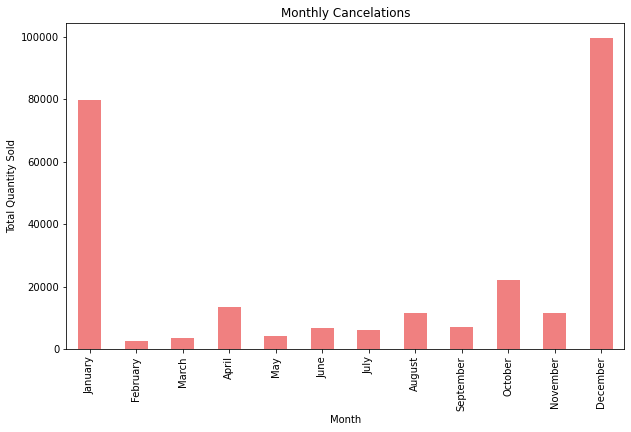

In [29]:
#calculate the monthly cancelations
monthly_sales_abs = cleaned_canceled.groupby('Month')['Quantity'].sum().abs()

#set month names as index
monthly_sales_abs.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#plotting the bar graph
plt.figure(figsize=(10, 6))
monthly_sales_abs.plot(kind='bar', color='lightcoral')
plt.title('Monthly Cancelations')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()


## VII. Conclusion


In concluding our exploration of the UCI Online Retail dataset, we have unearthed valuable insights that can significantly influence strategic decision-making. Our journey through customer analysis, product trends, and temporal patterns provides a holistic view of the dataset's dynamics.

The identification of customer segments and popular products offers actionable intelligence for targeted marketing and inventory management. Temporal analysis reveals patterns that can inform operational strategies over different timeframes.

As we wrap up, the key takeaway lies in leveraging these insights for enhanced business performance. Whether optimizing marketing strategies, refining inventory decisions, or understanding customer behavior, the dataset's revelations set the stage for informed actions. This EDA lays a foundation for continued exploration and more targeted interventions in the evolving landscape of online retail.